<a href="https://colab.research.google.com/github/firdazhamaroh/Analisis-sentimen-kinerja-prabowo-gibran-di-x/blob/main/crawl_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***CRAWLING DATA***

In [ ]:
#@title Twitter Auth Token
twitter_auth_token = 'auth_token' # isi dengan token API Twitter

In [ ]:
# ================================
# INSTALL DEPENDENSI LINUX + NODE + PLAYWRIGHT + PYTHON
# ================================

!apt-get update -y
!apt-get install -y \
  libatk-bridge2.0-0 \
  libatk1.0-0 \
  libcups2 \
  libdrm2 \
  libxkbcommon0 \
  libxcomposite1 \
  libxdamage1 \
  libxfixes3 \
  libxrandr2 \
  libgbm1 \
  libasound2 \
  libpangocairo-1.0-0 \
  libgtk-3-0 \
  fonts-liberation \
  libnss3 \
  xdg-utils \
  wget \
  curl

# Install Node.js 20 (stabil)
!curl -fsSL https://deb.nodesource.com/setup_20.x | bash -
!apt-get install -y nodejs

# Install Chromium untuk Playwright
!npx playwright install chromium

# Install library Python
!pip install pandas openpyxl

print("✅ Semua dependensi berhasil di-install")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,592 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,600 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,968 kB]
Get:14 htt

In [ ]:
# Crawl Data
filename = 'prabowogibran.csv'
search_keyword = '100 hari kerja prabowo gibran since:2025-02-01 lang:id'
limit = 3000
!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧^C


In [ ]:
import pandas as pd

#Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

#Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

#Display the DataFrame
display(df)

FileNotFoundError: [Errno 2] No such file or directory: 'tweets-data/prabowogibran3.csv'

In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

In [ ]:
df.to_excel('/content/prabowogibran3.xlsx', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p /content/drive/MyDrive/crawling

In [ ]:
df.to_csv(
    '/content/drive/MyDrive/crawling/prabowogibran3.csv',
    index=False,
)

## ***IMPOR DATA***

In [ ]:
import pandas as pd
import re
data1 = pd.read_excel('/content/prabowogibran1.xlsx')
data2 = pd.read_excel('/content/prabowogibran2.xlsx')
data3 = pd.read_excel('/content/prabowogibran3.xlsx')

if (

    data1.columns.equals(data2.columns) and

    data1.columns.equals(data3.columns)
):
   data = pd.concat([data1, data2, data3], ignore_index=True)
else:
  raise ValueEror("Struktur kolom tidak sama, concat dibatalkan")

In [ ]:
data.to_csv('/content/prabowogibran_marge.csv',index=False)

In [ ]:
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988433158405308928,Wed Nov 12 02:26:22 +0000 2025,0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,1988433158405308928,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198843315840530...,702270945,NaN
1,1987508806352589056,Sun Nov 09 13:13:49 +0000 2025,0,@fajarnugros Survei Indikator Politik Indonesi...,1987508930860503040,NaN,fajarnugros,in,NaN,0,1,1,https://x.com/undefined/status/198750893086050...,1720665183188922112,NaN
2,1980115717824372992,Mon Oct 20 03:42:07 +0000 2025,0,Langkah ini bertujuan memberikan napas dan har...,1980117300004246016,NaN,txtangkringan,in,NaN,0,1,0,https://x.com/undefined/status/198011730000424...,1489658156989189888,NaN
3,1956861673299643904,Sat Aug 16 23:32:34 +0000 2025,0,Prabowo Inspektur Upacara jadi simbol kerja ny...,1956861673299643904,https://pbs.twimg.com/media/GygrUfLbMAAzr4W.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/195686167329964...,1438681325964197888,NaN
4,1951514187819015936,Sun Aug 03 01:22:38 +0000 2025,0,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,1951815942331392000,NaN,ulapdoyo76,in,NaN,0,1,0,https://x.com/undefined/status/195181594233139...,1720665183188922112,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      2931 non-null   int64  
 1   created_at               2931 non-null   object 
 2   favorite_count           2931 non-null   int64  
 3   full_text                2931 non-null   object 
 4   id_str                   2931 non-null   int64  
 5   image_url                1341 non-null   object 
 6   in_reply_to_screen_name  1039 non-null   object 
 7   lang                     2931 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              2931 non-null   int64  
 10  reply_count              2931 non-null   int64  
 11  retweet_count            2931 non-null   int64  
 12  tweet_url                2931 non-null   object 
 13  user_id_str              2931 non-null   int64  
 14  username                

In [ ]:
df = pd.DataFrame(data[['full_text']])
df.head()

,full_text
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...
1,@fajarnugros Survei Indikator Politik Indonesi...
2,Langkah ini bertujuan memberikan napas dan har...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...


***PROSES HAPUS DATA DUPLIKAT***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  2931 non-null   object
dtypes: object(1)
memory usage: 23.0+ KB


In [ ]:
df.drop_duplicates(subset ="full_text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 2929
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  2420 non-null   object
dtypes: object(1)
memory usage: 37.8+ KB


# ***WORDCLOUD DAN FREKUENSI KATA SEBELUM MASUK KE PREPROCESSING***

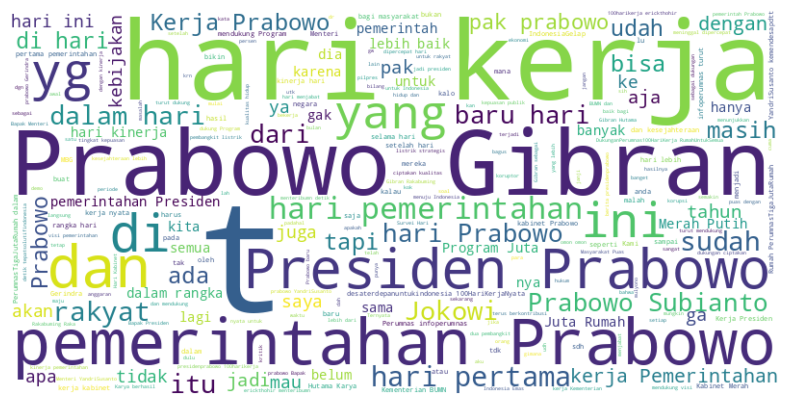

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['full_text'] = df['full_text'].fillna('')

text = ' '.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

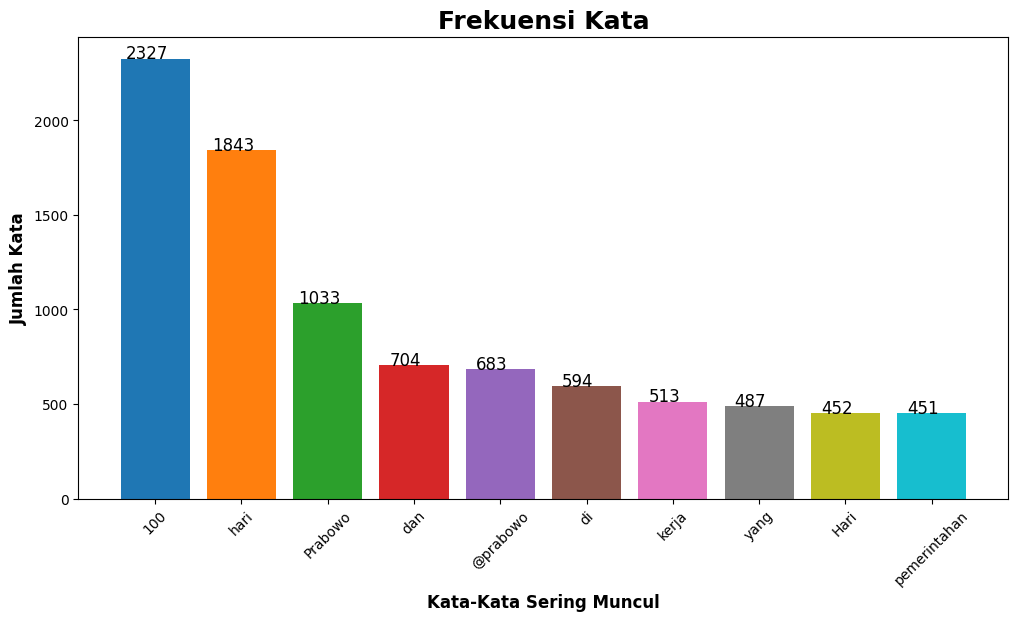

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# ***PROSES PREPROCESSING DATA***

***CLEANNING***

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Menghapus semua simbol
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)  # Menghapus semua angka
    return tweet

def remove_username(text):
    import re
    return re.sub(r'@[^\s]+', '', text)


df['cleaning'] = df['full_text'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,full_text,cleaning
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...


# ***CASE FOLDING***

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,full_text,cleaning,case_folding
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...


# ***NORMALIZATION***

In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(df[['full_text','cleaning','case_folding']])
data.head(5)

,full_text,cleaning,case_folding
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...


# ***Proses Download kamus slag/Normalisasi Kata***

In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['hasil_normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df =  pd.DataFrame(data[['full_text','cleaning','case_folding','hasil_normalisasi']])

df.head(10)

,full_text,cleaning,case_folding,hasil_normalisasi
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...,survei indikator politik indonesia okt tunjukk...
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak ok...
5,Penilaian publik terhadap kinerja Presiden Pra...,Penilaian publik terhadap kinerja Presiden Pra...,penilaian publik terhadap kinerja presiden pra...,penilaian publik terhadap kinerja presiden pra...
6,100 hari kerja pemerintahan Presiden Prabowo m...,hari kerja pemerintahan Presiden Prabowo mend...,hari kerja pemerintahan presiden prabowo mend...,hari kerja pemerintahan presiden prabowo menda...
7,Tingkat kepuasan publik ke Presiden Prabowo di...,Tingkat kepuasan publik ke Presiden Prabowo di...,tingkat kepuasan publik ke presiden prabowo di...,tingkat kepuasan publik ke presiden prabowo di...
8,@TOPssttt @newIding30 @Ary_PrasKe2 @KusAryani8...,httpstcoC...,httpstcoc...,httpstcoczmhepmz emtah warga mana yang disurve
9,Konde melakukan riset 100 hari Pemerintahan Pr...,Konde melakukan riset hari Pemerintahan Prabo...,konde melakukan riset hari pemerintahan prabo...,konde melakukan riset hari pemerintahan prabow...


# ***TOKENIZING***

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['hasil_normalisasi'].apply(tokenize)

df.head(5)

,full_text,cleaning,case_folding,hasil_normalisasi,tokenize
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,"[setelah, setahun, lebih, prabowogibran, kepua..."
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...,survei indikator politik indonesia okt tunjukk...,"[survei, indikator, politik, indonesia, okt, t..."
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,"[langkah, ini, bertujuan, memberikan, napas, d..."
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,"[prabowo, inspektur, upacara, jadi, simbol, ke..."
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak ok...,"[sebagai, menko, pemberdayaan, masyarakat, sej..."


***STOPWORD REMOVAL***

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,full_text,cleaning,case_folding,hasil_normalisasi,tokenize,stopword removal
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,"[setelah, setahun, lebih, prabowogibran, kepua...","[setahun, prabowogibran, kepuasan, rakyat, cap..."
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...,survei indikator politik indonesia okt tunjukk...,"[survei, indikator, politik, indonesia, okt, t...","[survei, indikator, politik, indonesia, okt, t..."
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,"[langkah, ini, bertujuan, memberikan, napas, d...","[langkah, bertujuan, napas, harapan, pelaku, u..."
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,"[prabowo, inspektur, upacara, jadi, simbol, ke...","[prabowo, inspektur, upacara, simbol, kerja, n..."
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak ok...,"[sebagai, menko, pemberdayaan, masyarakat, sej...","[menko, pemberdayaan, masyarakat, okt, muhaimi..."


***STEMMING***

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,full_text,cleaning,case_folding,hasil_normalisasi,tokenize,stopword removal,steming_data
0,Setelah setahun lebih Prabowo-Gibran kepuasan ...,Setelah setahun lebih PrabowoGibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,setelah setahun lebih prabowogibran kepuasan r...,"[setelah, setahun, lebih, prabowogibran, kepua...","[setahun, prabowogibran, kepuasan, rakyat, cap...",tahun prabowogibran puas rakyat capai kendali ...
1,@fajarnugros Survei Indikator Politik Indonesi...,Survei Indikator Politik Indonesia Okt tunj...,survei indikator politik indonesia okt tunj...,survei indikator politik indonesia okt tunjukk...,"[survei, indikator, politik, indonesia, okt, t...","[survei, indikator, politik, indonesia, okt, t...",survei indikator politik indonesia okt tunjuk ...
2,Langkah ini bertujuan memberikan napas dan har...,Langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,langkah ini bertujuan memberikan napas dan har...,"[langkah, ini, bertujuan, memberikan, napas, d...","[langkah, bertujuan, napas, harapan, pelaku, u...",langkah tuju napas harap laku umkm beban kredi...
3,Prabowo Inspektur Upacara jadi simbol kerja ny...,Prabowo Inspektur Upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,prabowo inspektur upacara jadi simbol kerja ny...,"[prabowo, inspektur, upacara, jadi, simbol, ke...","[prabowo, inspektur, upacara, simbol, kerja, n...",prabowo inspektur upacara simbol kerja nyata k...
4,@ulapdoyo76 @VDSyst3msX @gibran_tweet Sebagai ...,Sebagai Menko Pemberdayaan Masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak...,sebagai menko pemberdayaan masyarakat sejak ok...,"[sebagai, menko, pemberdayaan, masyarakat, sej...","[menko, pemberdayaan, masyarakat, okt, muhaimi...",menko daya masyarakat okt muhaimin iskandar ba...


***PROSES HAPUS DATA NULL***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_text          2420 non-null   object
 1   cleaning           2420 non-null   object
 2   case_folding       2420 non-null   object
 3   hasil_normalisasi  2420 non-null   object
 4   tokenize           2420 non-null   object
 5   stopword removal   2420 non-null   object
 6   steming_data       2420 non-null   object
dtypes: object(7)
memory usage: 151.2+ KB


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_text          2420 non-null   object
 1   cleaning           2420 non-null   object
 2   case_folding       2420 non-null   object
 3   hasil_normalisasi  2420 non-null   object
 4   tokenize           2420 non-null   object
 5   stopword removal   2420 non-null   object
 6   steming_data       2420 non-null   object
dtypes: object(7)
memory usage: 151.2+ KB


***WORDCLOUD DAN FREKUENSI KATA SESUDAH PREPROCESSING***

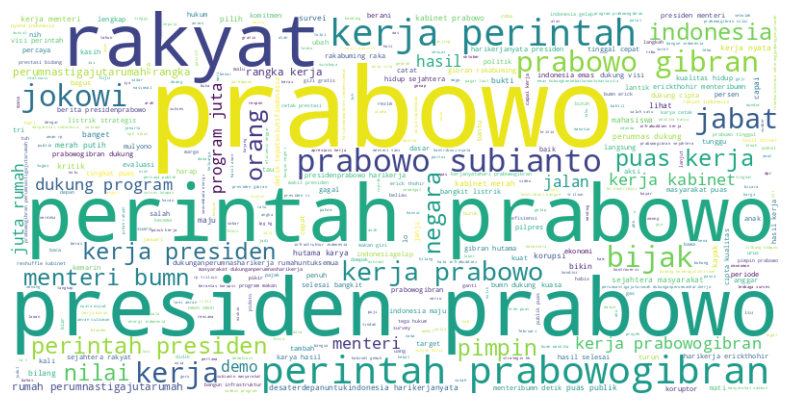

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(data['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'kak' ,'tan','sih','mbak'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

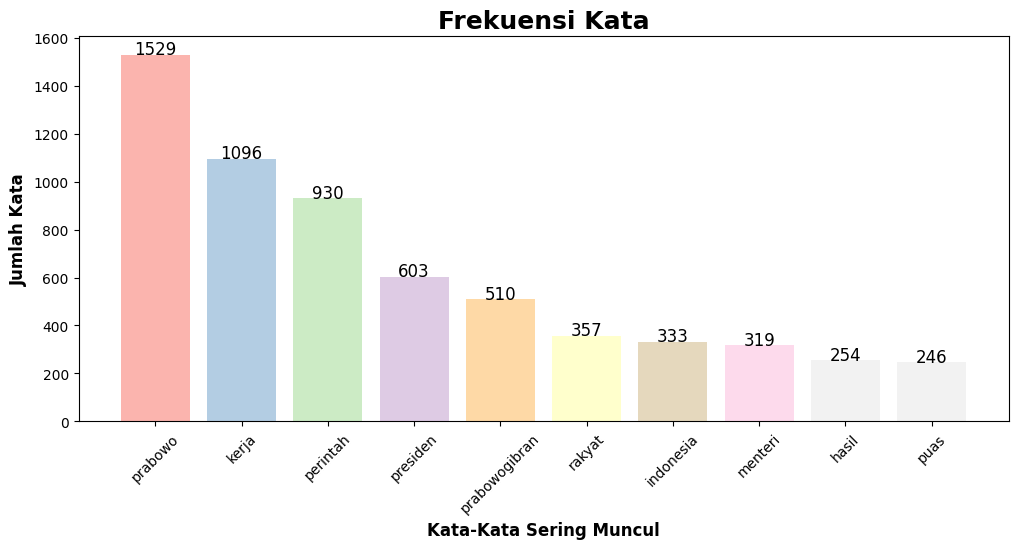

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(data["steming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'kak' ,'tan','pemerintahnaikkangajiguru','ajar'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 1.6 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()

In [ ]:
# Simpan DataFrame ke file Excel
df.to_excel('data_preprocessing.xlsx', index=False)


## PELABELAN MENGGUNAKAN LEXICON-BASED

In [ ]:
import pandas as pd

data = pd.read_excel("/content/data_preprocessing.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_text          2420 non-null   object
 1   cleaning           2420 non-null   object
 2   case_folding       2420 non-null   object
 3   hasil_normalisasi  2420 non-null   object
 4   tokenize           2420 non-null   object
 5   stopword removal   2420 non-null   object
 6   steming_data       2417 non-null   object
dtypes: object(7)
memory usage: 132.5+ KB


In [ ]:
data = pd.DataFrame(df[['steming_data']])
data.head(5)

,steming_data
0,tahun prabowogibran puas rakyat capai kendali ...
1,survei indikator politik indonesia okt tunjuk ...
2,langkah tuju napas harap laku umkm beban kredi...
3,prabowo inspektur upacara simbol kerja nyata k...
4,menko daya masyarakat okt muhaimin iskandar ba...


In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'label']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(10)

,steming_data,Score,label
0,tahun prabowogibran puas rakyat capai kendali ...,3,Positif
1,survei indikator politik indonesia okt tunjuk ...,4,Positif
2,langkah tuju napas harap laku umkm beban kredi...,1,Positif
3,prabowo inspektur upacara simbol kerja nyata k...,3,Positif
4,menko daya masyarakat okt muhaimin iskandar ba...,2,Positif
5,nilai publik kerja presiden prabowo tunjuk pua...,4,Positif
6,kerja perintah presiden prabowo puas masyaraka...,3,Positif
7,tingkat puas publik presiden prabowo kerja tem...,5,Positif
8,httpstcoczmhepmz emtah warga disurve,0,Netral
9,konde riset perintah prabowogibran perspektif ...,-5,Negatif


/tmp/ipython-input-2591995174.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


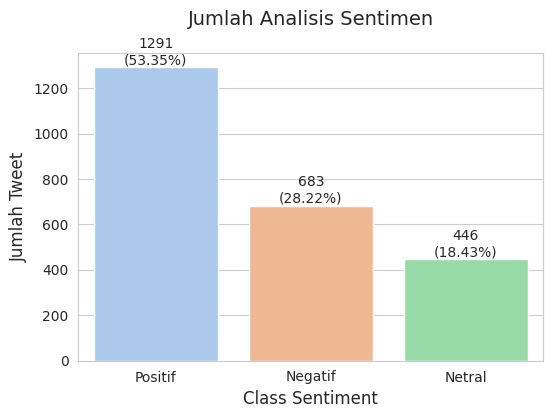

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
# Simpan DataFrame ke file Excel
data.to_excel('data_labeling.xlsx', index=False)


## ***WORDCLOUD POSITIF, NEGATIF, NETRAL***

In [ ]:
import pandas as pd

data = pd.read_excel("/content/data_labeling.xlsx")
data.head(10)

,steming_data,Score,label
0,tahun prabowogibran puas rakyat capai kendali ...,3,Positif
1,survei indikator politik indonesia okt tunjuk ...,4,Positif
2,langkah tuju napas harap laku umkm beban kredi...,1,Positif
3,prabowo inspektur upacara simbol kerja nyata k...,3,Positif
4,menko daya masyarakat okt muhaimin iskandar ba...,2,Positif
5,nilai publik kerja presiden prabowo tunjuk pua...,4,Positif
6,kerja perintah presiden prabowo puas masyaraka...,3,Positif
7,tingkat puas publik presiden prabowo kerja tem...,5,Positif
8,httpstcoczmhepmz emtah warga disurve,0,Netral
9,konde riset perintah prabowogibran perspektif ...,-5,Negatif


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Daftar stopwords tambahan yang ingin dikecualikan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
    'kak', 'tan', 'dll', 'ajar', 'dan', 'di', 'ke',
    'dari', 'adalah', 'yang', 'untuk', 'dengan', 'pada', 'ini','bijak','bagus'
])

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['label'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['label'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['label'] == 'Positif']['steming_data'].str.cat(sep=' ')

# ***WORDCLOUD POSITIF***

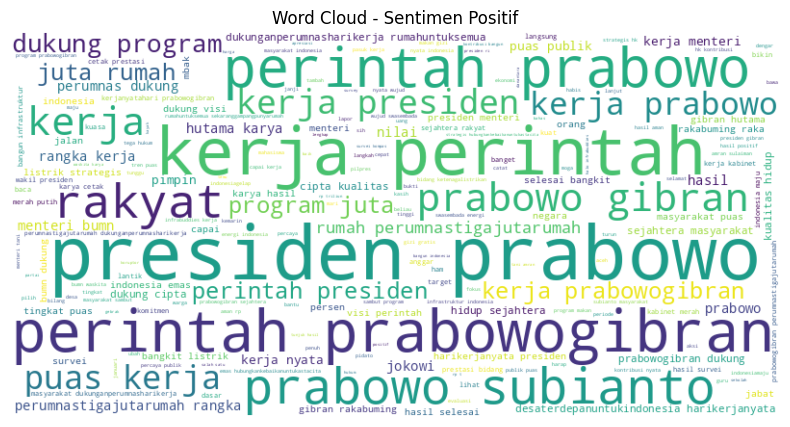

In [ ]:
# Buat word cloud untuk masing-masing sentimen
generate_wordcloud(sentimen_Positive, "Word Cloud - Sentimen Positif")

# ***WORDCLOUD NEGATIF***

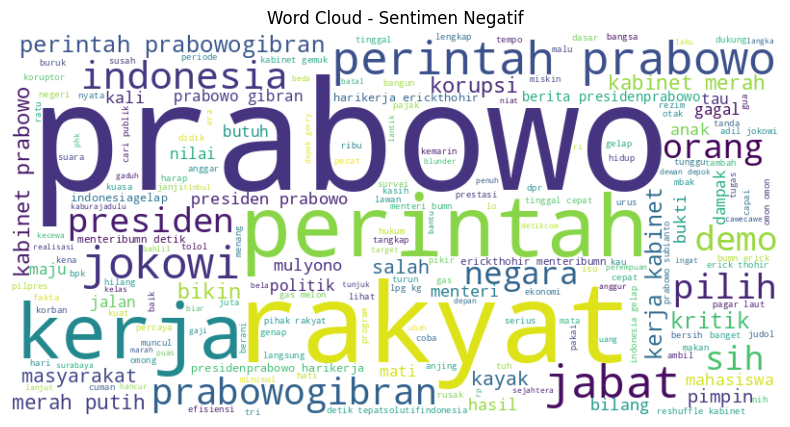

In [ ]:
# Buat word cloud untuk masing-masing sentimen
generate_wordcloud(sentimen_Negative, "Word Cloud - Sentimen Negatif")

# ***WORDCLOUD NETRAL***

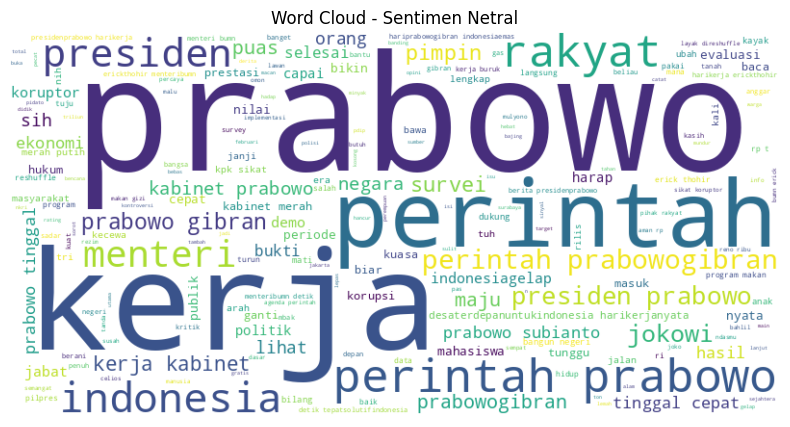

In [ ]:
# Buat word cloud untuk masing-masing sentimen
generate_wordcloud(sentimen_Neutral, "Word Cloud - Sentimen Netral")

# ***MODELING IMPORT AND LIBRARY***

In [ ]:
data = pd.read_excel("/content/data_labeling.xlsx")
data.head(10)

,steming_data,Score,label
0,tahun prabowogibran puas rakyat capai kendali ...,3,Positif
1,survei indikator politik indonesia okt tunjuk ...,4,Positif
2,langkah tuju napas harap laku umkm beban kredi...,1,Positif
3,prabowo inspektur upacara simbol kerja nyata k...,3,Positif
4,menko daya masyarakat okt muhaimin iskandar ba...,2,Positif
5,nilai publik kerja presiden prabowo tunjuk pua...,4,Positif
6,kerja perintah presiden prabowo puas masyaraka...,3,Positif
7,tingkat puas publik presiden prabowo kerja tem...,5,Positif
8,httpstcoczmhepmz emtah warga disurve,0,Netral
9,konde riset perintah prabowogibran perspektif ...,-5,Negatif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  2417 non-null   object
 1   Score         2420 non-null   int64 
 2   label         2420 non-null   object
dtypes: int64(1), object(2)
memory usage: 56.8+ KB


In [ ]:
label_count = data['label'].value_counts()
label_count

,count
label,
Positif,1291
Negatif,683
Netral,446


In [ ]:
data.head(10)

,steming_data,Score,label
0,tahun prabowogibran puas rakyat capai kendali ...,3,Positif
1,survei indikator politik indonesia okt tunjuk ...,4,Positif
2,langkah tuju napas harap laku umkm beban kredi...,1,Positif
3,prabowo inspektur upacara simbol kerja nyata k...,3,Positif
4,menko daya masyarakat okt muhaimin iskandar ba...,2,Positif
5,nilai publik kerja presiden prabowo tunjuk pua...,4,Positif
6,kerja perintah presiden prabowo puas masyaraka...,3,Positif
7,tingkat puas publik presiden prabowo kerja tem...,5,Positif
8,httpstcoczmhepmz emtah warga disurve,0,Netral
9,konde riset perintah prabowogibran perspektif ...,-5,Negatif


In [ ]:
df_list = data['steming_data'].tolist()
print(df_list)

['tahun prabowogibran puas rakyat capai kendali harga bbm amp pangan program makan siang gratis rakyat puas banget kerja keras kabinet kompak bikin jokowi kalah telak httpstcovbqyrpyt', 'survei indikator politik indonesia okt tunjuk publik puas kerja prabowogibran tahun puas prabowo turun survei kerja alas utama puas anggap hasil berantas korupsi menteri tani andi amran', 'langkah tuju napas harap laku umkm beban kredit macet jalan kembang usaha httpstcoqydvdqvtnf', 'prabowo inspektur upacara simbol kerja nyata kerja perintah prabowogibran bikin publik auto senyum puas dirgahayunkri httpstcodwlofsojl', 'menko daya masyarakat okt muhaimin iskandar bangga popularitas tinggi perintah prabowogibran fokus program entas miskin amp daya masyarakat janji juta lapang kerja gibran realisasi', 'nilai publik kerja presiden prabowo tunjuk puas httpstcoxizmddhwg', 'kerja perintah presiden prabowo puas masyarakat httpstcoeulgdva', 'tingkat puas publik presiden prabowo kerja tembus angka tinggi optimi

# ***FEATURE EKSTRATION TF-IDF***

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# ===============================
# AMBIL 3 DOKUMEN
# ===============================
documents = data['steming_data'].astype(str).tolist()[:3]

# ===============================
# TF FREKUENSI (COUNT)
# ===============================
count_vectorizer = CountVectorizer()
tf_matrix = count_vectorizer.fit_transform(documents)

terms = count_vectorizer.get_feature_names_out()

# DataFrame TF (frekuensi asli)
tf_df = pd.DataFrame(
    tf_matrix.toarray().T,
    index=terms,
    columns=['D1', 'D2', 'D3']
)

# ===============================
# IDF & TF-IDF
# ===============================
tfidf_vectorizer = TfidfVectorizer(vocabulary=terms)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

idf_values = tfidf_vectorizer.idf_

idf_df = pd.DataFrame(
    idf_values,
    index=terms,
    columns=['IDF']
)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray().T,
    index=terms,
    columns=['D1', 'D2', 'D3']
)

# ===============================
# GABUNGKAN TF, IDF, TF-IDF
# ===============================
result = pd.concat(
    [tf_df, idf_df, tfidf_df],
    axis=1,
    keys=['TF', 'IDF', 'TF-IDF']
)

# Rapikan MultiIndex kolom
result.columns = pd.MultiIndex.from_tuples([
    ('TF', 'D1'), ('TF', 'D2'), ('TF', 'D3'),
    ('IDF', ''),
    ('TF-IDF', 'D1'), ('TF-IDF', 'D2'), ('TF-IDF', 'D3')
])

# Nama index
result.index.name = 'Term'

# ===============================
# TAMPILKAN HASIL
# ===============================
print(result)


                   TF             IDF    TF-IDF                   
                   D1 D2 D3                  D1        D2       D3
Term                                                              
alas                0  1  0  1.693147  0.000000  0.180551  0.00000
amp                 1  0  0  1.693147  0.192276  0.000000  0.00000
amran               0  1  0  1.693147  0.000000  0.180551  0.00000
andi                0  1  0  1.693147  0.000000  0.180551  0.00000
anggap              0  1  0  1.693147  0.000000  0.180551  0.00000
banget              1  0  0  1.693147  0.192276  0.000000  0.00000
bbm                 1  0  0  1.693147  0.192276  0.000000  0.00000
beban               0  0  1  1.693147  0.000000  0.000000  0.27735
berantas            0  1  0  1.693147  0.000000  0.180551  0.00000
bikin               1  0  0  1.693147  0.192276  0.000000  0.00000
capai               1  0  0  1.693147  0.192276  0.000000  0.00000
gratis              1  0  0  1.693147  0.192276  0.000000  0.0

# ***KLASIFIKASI BEFORE SMOTE***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Jumlah data training: 1936
Jumlah data testing: 484


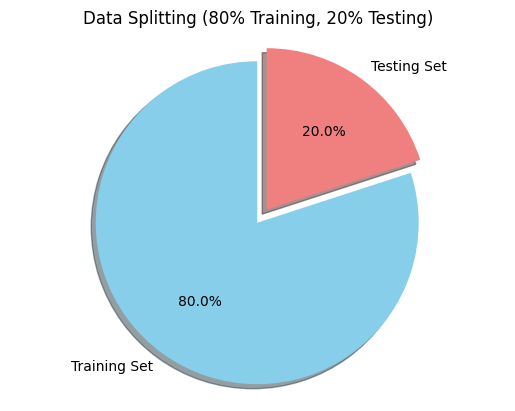

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# TF-IDF VECTORIZE
# ===============================

# Inisialisasi TF-IDF
vectorizer = TfidfVectorizer()

# Transform data teks
X = vectorizer.fit_transform(
    data['steming_data'].astype(str).fillna('')
)

# Label
y = data['label']

# ===============================
# TRAIN TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

# ===============================
# VISUALISASI SPLIT DATA
# ===============================

train_size = X_train.shape[0]
test_size = X_test.shape[0]

labels = ['Training Set', 'Testing Set']
sizes = [train_size, test_size]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.axis('equal')
plt.title('Data Splitting (80% Training, 20% Testing)')
plt.show()

Classifier: Support Vector Machine
Accuracy: 0.7252066115702479
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.65      0.82      0.73       131
      Netral       0.84      0.15      0.25       110
     Positif       0.76      0.93      0.84       243

    accuracy                           0.73       484
   macro avg       0.75      0.63      0.60       484
weighted avg       0.75      0.73      0.67       484

Confusion Matrix:
[[108   2  21]
 [ 43  16  51]
 [ 15   1 227]]


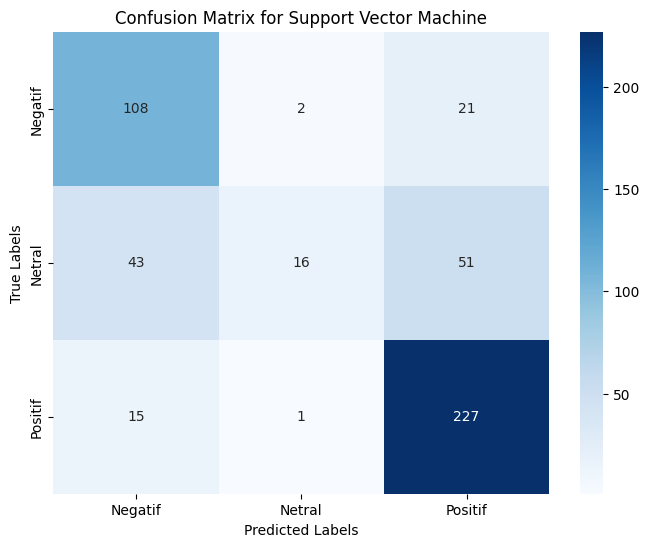

Classifier: Naive Bayes
Accuracy: 0.6074380165289256
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.70      0.44      0.54       131
      Netral       0.33      0.01      0.02       110
     Positif       0.59      0.97      0.73       243

    accuracy                           0.61       484
   macro avg       0.54      0.47      0.43       484
weighted avg       0.56      0.61      0.52       484

Confusion Matrix:
[[ 58   2  71]
 [ 17   1  92]
 [  8   0 235]]


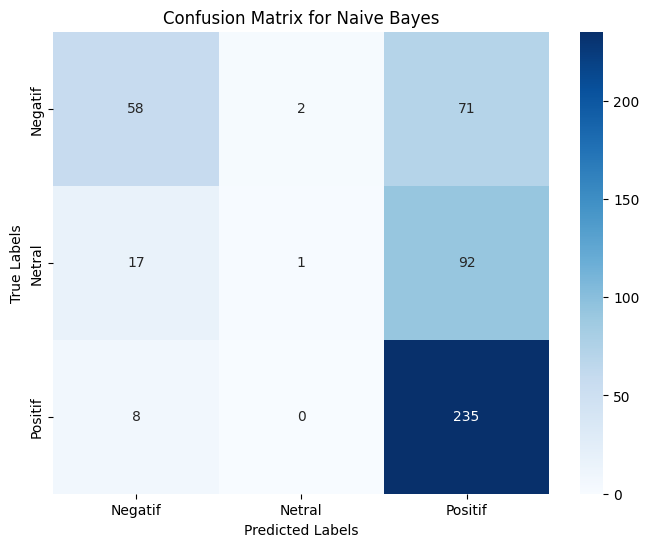

In [ ]:
# Define a dictionary of classifiers (SVM & Naive Bayes only)
classifiers = {
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=clf.classes_,
        yticklabels=clf.classes_
    )
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


# ***VISUALISASI PERBANDINGAN AKURASI BEFORE SMOTE***

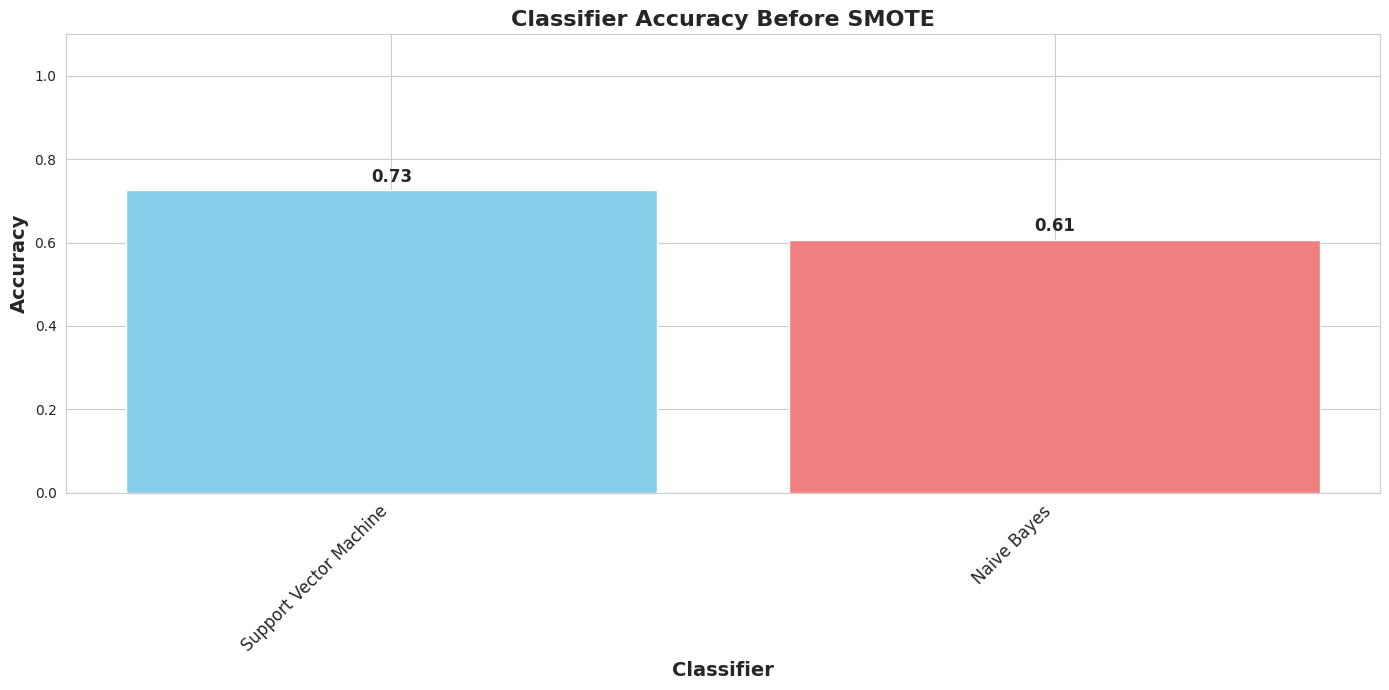

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'results' dictionary is defined from previous code
classifiers = list(results.keys())
accuracy_before = [results[name]['accuracy'] for name in classifiers]

# Improved Plotting
plt.figure(figsize=(14, 7))  # Slightly larger figure for better readability
bars = plt.bar(classifiers, accuracy_before, color=['skyblue', 'lightcoral',]) # Different colors
plt.xlabel("Classifier", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
plt.title("Classifier Accuracy Before SMOTE", fontsize=16, fontweight='bold')
plt.ylim(0, 1.1) # Set y-axis limit
plt.xticks(rotation=45, ha="right", fontsize=12) # Adjust font size and rotation

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracy_before):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ***SMOTE***

In [ ]:
from imblearn.over_sampling import SMOTE

print(label_count)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("SMOTE applied successfully.")
print("Shape of X after SMOTE:", X_smote.shape)
print("Shape of y after SMOTE:", y_smote.shape)

label_count_smote = pd.Series(y_smote).value_counts()
print("\nClass distribution after SMOTE:\n", label_count_smote)

label
Positif    1291
Negatif     683
Netral      446
Name: count, dtype: int64
SMOTE applied successfully.
Shape of X after SMOTE: (3873, 6532)
Shape of y after SMOTE: (3873,)

Class distribution after SMOTE:
 label
Positif    1291
Netral     1291
Negatif    1291
Name: count, dtype: int64


/tmp/ipython-input-2591995174.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


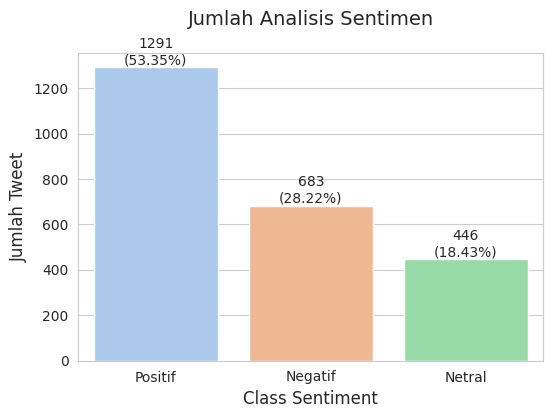

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

/tmp/ipython-input-4089010247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_count_smote.index, y=label_count_smote.values, palette='pastel')


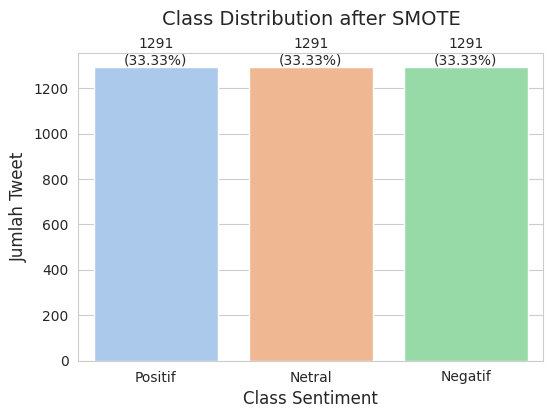

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_smote is the target variable after SMOTE
# Assuming y_smote is a pandas Series
label_count_smote = pd.Series(y_smote).value_counts()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=label_count_smote.index, y=label_count_smote.values, palette='pastel')
plt.title('Class Distribution after SMOTE', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
total = len(y_smote)

for i, count in enumerate(label_count_smote.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')
plt.show()

# ***KLASIFIKASI AFTER SMOTE***

Classifier: Support Vector Machine (After SMOTE)
Accuracy: 0.9070967741935484
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.93      0.91       242
      Netral       0.95      0.89      0.92       270
     Positif       0.88      0.90      0.89       263

    accuracy                           0.91       775
   macro avg       0.91      0.91      0.91       775
weighted avg       0.91      0.91      0.91       775

Confusion Matrix:
[[226   3  13]
 [ 11 241  18]
 [ 18   9 236]]


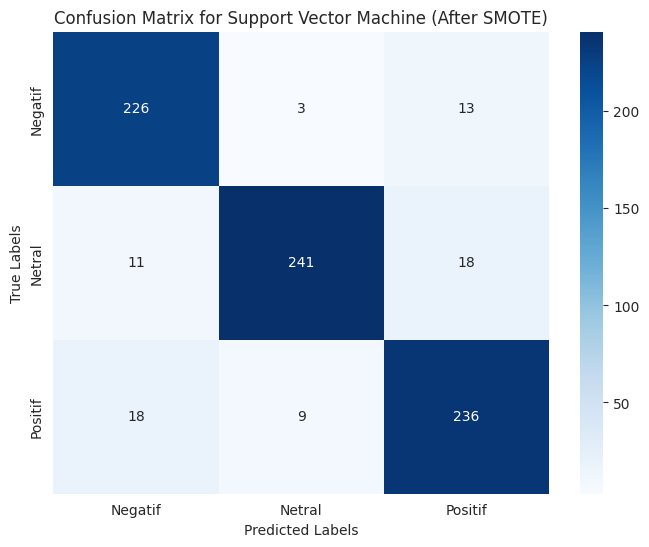

Classifier: Naive Bayes (After SMOTE)
Accuracy: 0.8412903225806452
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.84      0.90      0.87       242
      Netral       0.81      0.88      0.84       270
     Positif       0.88      0.75      0.81       263

    accuracy                           0.84       775
   macro avg       0.84      0.84      0.84       775
weighted avg       0.84      0.84      0.84       775

Confusion Matrix:
[[218  17   7]
 [ 13 238  19]
 [ 27  40 196]]


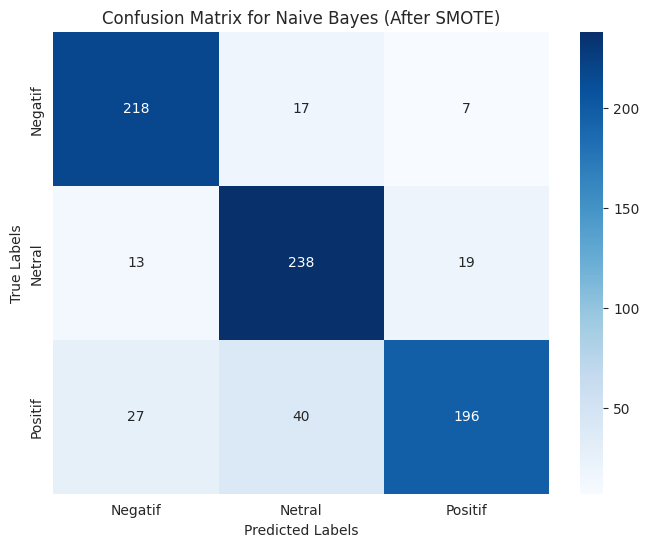

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets (after SMOTE)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

# Define a dictionary of classifiers (ONLY SVM & Naive Bayes)
classifiers = {
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate each classifier
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test_smote)

    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    results_smote[name] = {
        'accuracy': accuracy_smote,
        'classification_report': classification_report(y_test_smote, y_pred_smote),
        'confusion_matrix': confusion_matrix(y_test_smote, y_pred_smote)
    }

    print(f"Classifier: {name} (After SMOTE)")
    print(f"Accuracy: {accuracy_smote}")
    print(f"Classification Report:\n{classification_report(y_test_smote, y_pred_smote)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_smote, y_pred_smote)}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix(y_test_smote, y_pred_smote),
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=clf.classes_,
        yticklabels=clf.classes_
    )
    plt.title(f"Confusion Matrix for {name} (After SMOTE)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil hanya classifier yang dibutuhkan
selected_classifiers = [
    "Support Vector Machine",
    "Naive Bayes"
]

# Ambil accuracy sebelum dan sesudah SMOTE
accuracy_before = [results[name]['accuracy'] for name in selected_classifiers]
accuracy_after = [results_smote[name]['accuracy'] for name in selected_classifiers]

X_axis = np.arange(len(selected_classifiers))

plt.figure(figsize=(12, 6))

plt.bar(
    X_axis - 0.2,
    accuracy_before,
    0.4,
    label='Before SMOTE',
    color='skyblue'
)

plt.bar(
    X_axis + 0.2,
    accuracy_after,
    0.4,
    label='After SMOTE',
    color='lightcoral'
)

plt.xticks(
    X_axis,
    selected_classifiers,
    rotation=45,
    ha="right",
    fontsize=12
)

plt.xlabel("Classifier", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
plt.title(
    "Comparison of Classifier Accuracy Before and After SMOTE",
    fontsize=16,
    fontweight='bold'
)

plt.ylim(0, 1.1)
plt.legend(fontsize=12)

# Tambahkan nilai akurasi di atas bar
for i, acc in enumerate(accuracy_before):
    plt.text(
        i - 0.2,
        acc + 0.01,
        f"{acc:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

for i, acc in enumerate(accuracy_after):
    plt.text(
        i + 0.2,
        acc + 0.01,
        f"{acc:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


NameError: name 'results_smote' is not defined

# ***KLASIFIKASI PERBANDINGAN AKURASI BEFORE AFTER SMOTE***

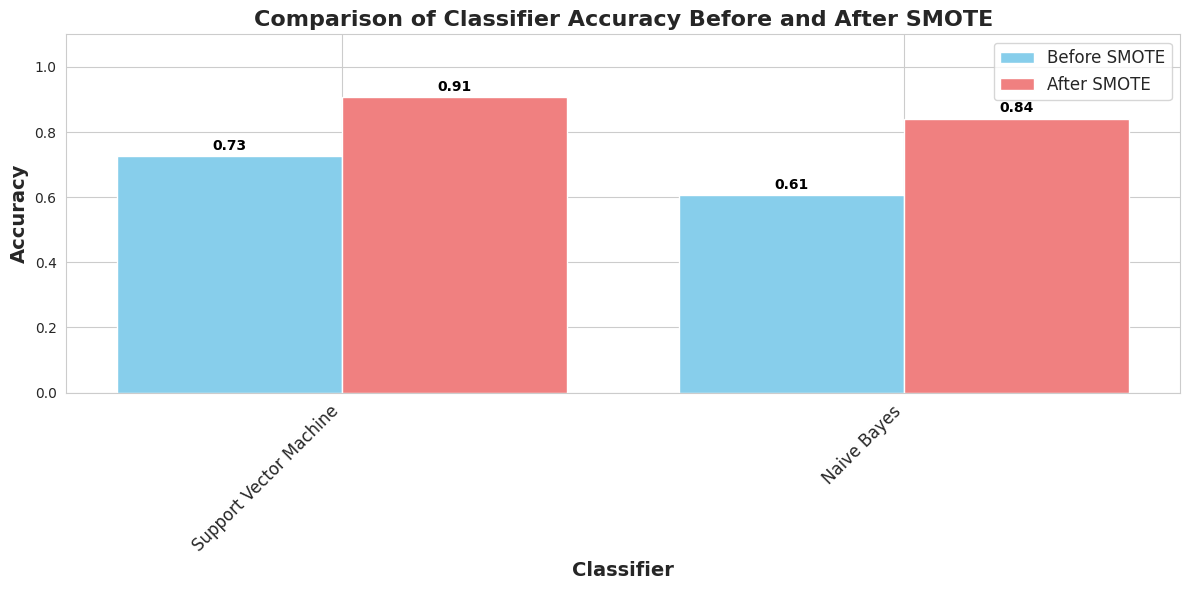

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'results' and 'results_smote' dictionaries are defined from previous code

classifiers = list(results.keys())
accuracy_before = [results[name]['accuracy'] for name in classifiers]
accuracy_after = [results_smote[name]['accuracy'] for name in classifiers]

X_axis = np.arange(len(classifiers))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, accuracy_before, 0.4, label='Before SMOTE', color='skyblue')
plt.bar(X_axis + 0.2, accuracy_after, 0.4, label='After SMOTE', color='lightcoral')

plt.xticks(X_axis, classifiers, rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels
plt.xlabel("Classifier", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
plt.title("Comparison of Classifier Accuracy Before and After SMOTE", fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)  # Set the y-axis limit
plt.legend(fontsize=12) # Adjust legend font size

# Add accuracy values on top of each bar with improved formatting
for i, acc in enumerate(accuracy_before):
    plt.text(i - 0.2, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
for i, acc in enumerate(accuracy_after):
    plt.text(i + 0.2, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
